Accuracy on Test Data: 99.67%
              precision    recall  f1-score   support

        lose       0.99      1.00      1.00       150
         win       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy on Training Data: 99.14%


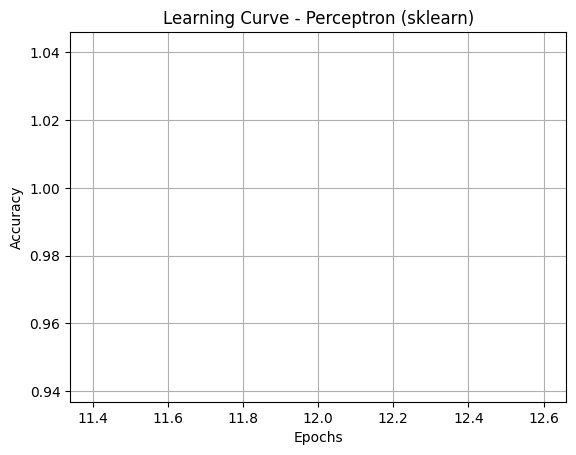

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('valorant_match_clsfc.csv')

# Encode kategori
categorical_cols = ['rank', 'agent', 'map', 'outcome', 'date']
encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col in categorical_cols:
    df[col] = encoders[col].transform(df[col])

# Pisahkan fitur dan target
features = df.drop(['game_id', 'episode', 'act', 'rank', 'date', 'outcome', 'headshot_pct', 'kills', 'assists'], axis=1)
target = df['outcome']

# Normalisasi data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=2, stratify=target)

# Implementasi Perceptron menggunakan sklearn
perceptron = Perceptron(
    max_iter=100,  # Maksimal jumlah iterasi
    eta0=0.5,  # Learning rate
    random_state=2,  # Reproducibility
    tol=1e-3,  # Toleransi penghentian
    verbose=0  # Menyembunyikan output verbose
)

# Melatih model
perceptron.fit(X_train, y_train)

# Evaluasi pada data uji
y_pred_test = perceptron.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Test Data: {accuracy_test * 100:.2f}%")
print(classification_report(y_test, y_pred_test, target_names=['lose', 'win']))

# Evaluasi pada data latih
y_pred_train = perceptron.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Training Data: {accuracy_train * 100:.2f}%")

# Plot Learning Curve
plt.plot(perceptron.n_iter_, accuracy_train, label='Train Accuracy', color='blue')
plt.title('Learning Curve - Perceptron (sklearn)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [3]:
# Buat DataFrame hasil prediksi pada data uji
results_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

# Simpan hasil prediksi data uji ke CSV
results_test.to_csv('perceptron_results_test.csv', index=False)
print("Hasil prediksi pada data uji disimpan ke perceptron_results_test.csv")

# Buat DataFrame hasil prediksi pada data latih
results_train = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred_train
})

# Simpan hasil prediksi data latih ke CSV
results_train.to_csv('perceptron_results_train.csv', index=False)
print("Hasil prediksi pada data latih disimpan ke perceptron_results_train.csv")


Hasil prediksi pada data uji disimpan ke perceptron_results_test.csv
Hasil prediksi pada data latih disimpan ke perceptron_results_train.csv
